# Исследование объявлений о продаже квартир

# Задача

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и параметры, влияющие на цену квартир.

# План

**1. Проведение обзора данных.** 
- Изучить общую информацию о полученном датафрейме;
- Построить гистограмму для всех числовых столбцов таблицы.

**2. Проведение предобработки данных.**
- Найти и заполнить пропущенные значения в столбцах;
- Найти столбцы, в которых нужно изменить тип данных;
- Устранить дубликаты;
- Устранить аномалии.

**3. Добавление в таблицу новых столбцов со следующими параметрами:**
- Цена одного квадратного метра;
- День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- Месяц публикации объявления;
- Год публикации объявления;
- Тип этажа квартиры (значения — «первый», «последний», «другой»);
- Расстояние до центра города в километрах.

**4. Проведение исследовательского анализа данных:**
- Изучить, как быстро продавались квартиры. Построить гистограмму. Посчитать среднее и медиану.
- Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта. Изучить, зависит ли цена от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - даты размещения (день недели, месяц, год).
  
  Построить графики, которые покажут зависимость цены от указанных выше параметров.
  

- Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Вычислить среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра. Учитывать каждый километр расстояния. Описать, как стоимость объектов зависит от расстояния до центра города — построить график изменения средней цены для каждого километра от центра Петербурга.

**5. Выводы.**

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загружаем данные из файла в датафрейм
estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

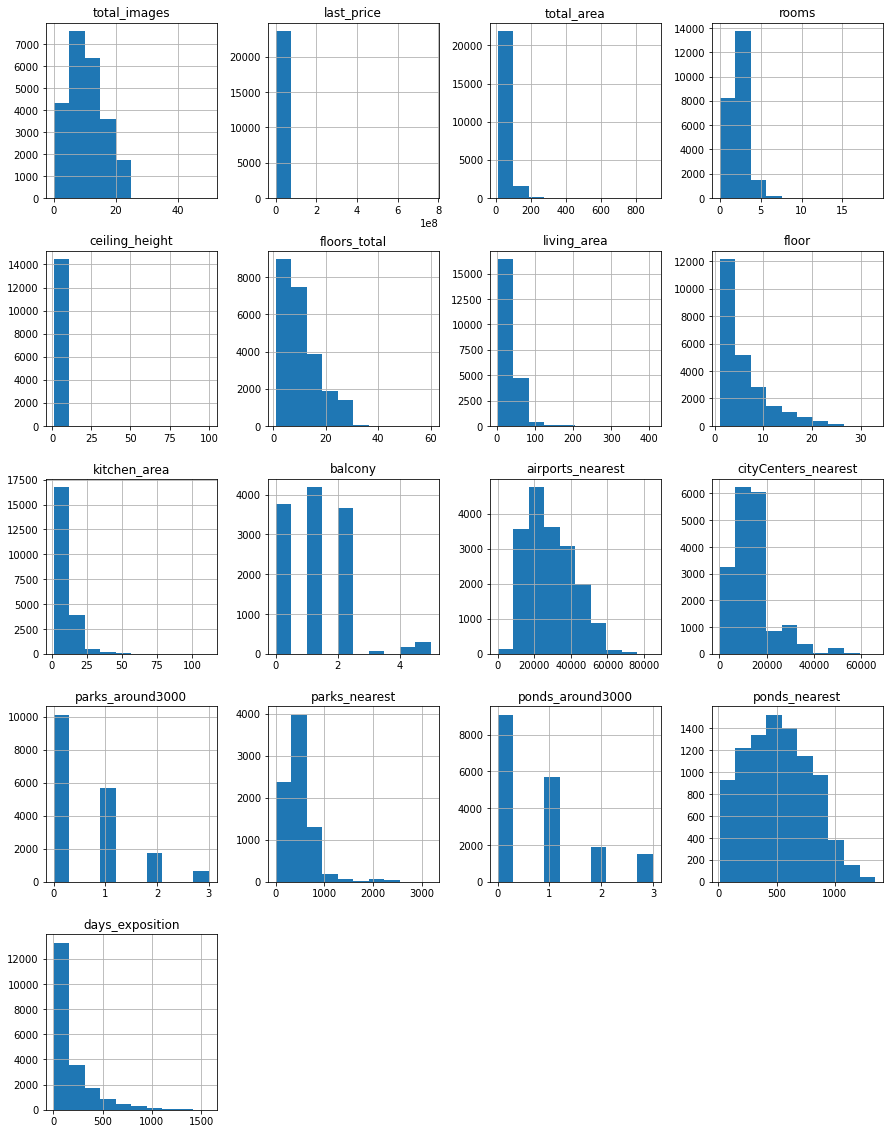

In [4]:
# Построим общую гистограмму для всех числовых столбцов таблицы
estate_data.hist(figsize=(15,20));

## Предобработка данных

### Обработка пропусков

In [5]:
# Определим, в каких столбцах есть пропуски
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Посчитаем долю пропусков по столбцам
estate_data.isna().sum() / 23699

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

В столбцах ceiling_height, is_apartment, balcony, parks_nearest, ponds_nearest высокая доля пропусков - от 40 до 90%.

#### Заполним пропущенные значения там, где это возможно.

- **ceiling_height - высота потолков (м).** Т.к. это количественная переменная, и потолок есть в любой квартире, а значит и высота потолка должна быть в любом случае, мы заменим пропущенные значения медианным.

- **living_area - жилая площадь в квадратных метрах (м²).** Заменим пропущенные значения медианным.

- **kitchen_area - площадь кухни в квадратных метрах (м²).** Заменим пропуски медианным значением.

- **airports_nearest - расстояние до ближайшего аэропорта в метрах (м).** Строк с такими пропусками много, удалить их нельзя, заменим их медианным значением.

- **cityCenters_nearest - расстояние до центра города (м).** Строк с такими пропусками много, удалить их нельзя, заменим их медианным значением.

- **parks_nearest - расстояние до ближайшего парка (м).** Пропусков много, больше половины данных. Заменим медианным значением, но при анализе будем учитывать, что данные искажены.

- **ponds_nearest - расстояние до ближайшего водоёма (м).** Пропусков много, больше половины данных. Заменим медианным значением, но при анализе будем учитывать, что данные искажены.

- **days_exposition - сколько дней было размещено объявление (от публикации до снятия).** Заменим пропуски медианным значением.

- **floors_total - всего этажей в доме.** Возмжно количество этажей не указали, т.к. этаж всего один. В любом случае, таких пропусков всего 86, так что заменим пропуски на 1.

- **is_apartment - апартаменты (логический тип).** Пропусков очень много - практически все данные, поэтому удалить такие строки мы не можем. Заменим пропущенные значения на False, но при анализе данных этот столбец нельзя будет учитывать.

- **balcony - число балконов.** Скорее всего, пустые значения там, где балконов в квартире нет. Поэтому заменим пропуски на 0.

- **locality_name - название населённого пункта.** Строк с такими пропусками всего 49, укажем название "Неизвестно".

- **parks_around3000 - число парков в радиусе 3 км.** Скорее всего, число парковов не указано, потому что их нет. Заменим пропуски на 0.

- **ponds_around3000 - число водоёмов в радиусе 3 км.** Скорее всего, число водоемов не указано, потому что их нет. Заменим пропуски на 0.

In [7]:
median_value = ['ceiling_height', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest',\
                'ponds_nearest', 'days_exposition']

for v in median_value:
    estate_data[v] = estate_data[v].fillna(value=estate_data[v].median())

In [8]:
zero_value = ['balcony', 'parks_around3000', 'ponds_around3000']

for v in zero_value:
    estate_data[v] = estate_data[v].fillna(value=0)

In [9]:
estate_data['floors_total'] = estate_data['floors_total'].fillna(value=1)

In [10]:
estate_data['is_apartment'] = estate_data['is_apartment'].fillna(value=False)

In [11]:
estate_data['locality_name'] = estate_data['locality_name'].fillna(value='Неизвестно')

In [12]:
# Проверим, что пропусков не осталось
estate_data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

### Обработка типов данных

- В столбце last_price находятся целые числа, приведем столбец к типу int.
- Приведем столбец first_day_exposition к типу datetime.
- В столбце floors_total находятся целые числа, приведем столбец к типу int.
- В столбце balcony находятся целые числа, приведем столбец к типу int.
- В столбце airports_nearest находятся целые числа, приведем столбец к типу int.
- В столбце parks_around3000 находятся целые числа, приведем столбец к типу int.
- В столбце ponds_around3000 находятся целые числа, приведем столбец к типу int.
- В столбце days_exposition находятся целые числа, приведем столбец к типу int.

In [13]:
estate_data = estate_data.astype({ "last_price": "int", "floors_total": "int", "balcony": "int", "airports_nearest": "int",\
                                   "parks_around3000": "int", "ponds_around3000": "int", "days_exposition": "int"})

In [14]:
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Типы данных поправили. Это нужно было сделать для удобства дальнейшей работы с данными.

### Обработка дубликатов

In [15]:
estate_data.duplicated().sum()

0

Явных дубликатов в данных нет. будем искать неявные.

In [16]:
# Изучим столбец locality_name
estate_data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестно',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'го

Скорее всего, нам не важно точное название населенного пункта. Поэтому для сокращения числа дубликатов, заменим все поселки городского типа на поселки.

In [17]:
estate_data.loc[estate_data['locality_name'].str.find('посёлок') != -1, 'locality_name'] = estate_data.loc[estate_data['locality_name'].str.find('посёлок') != -1, 'locality_name'].str.replace('посёлок', 'поселок')
estate_data.loc[estate_data['locality_name'].str.find('городской поселок') != -1, 'locality_name'] = estate_data.loc[estate_data['locality_name'].str.find('городской поселок') != -1, 'locality_name'].str.replace('городской поселок', 'поселок')
estate_data.loc[estate_data['locality_name'].str.find('поселок городского типа') != -1, 'locality_name'] = estate_data.loc[estate_data['locality_name'].str.find('поселок городского типа') != -1, 'locality_name'].str.replace('поселок городского типа', 'поселок')
estate_data.loc[estate_data['locality_name'].str.find('деревня') != -1, 'locality_name'] = estate_data.loc[estate_data['locality_name'].str.find('деревня') != -1, 'locality_name'].str.replace('деревня', 'поселок')
estate_data.loc[estate_data['locality_name'].str.find('село ') != -1, 'locality_name'] = estate_data.loc[estate_data['locality_name'].str.find('село ') != -1, 'locality_name'].str.replace('село ', 'поселок ')

In [18]:
estate_data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'поселок Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'поселок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'поселок Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'поселок Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'поселок Старая',
       'поселок Лесколово', 'поселок Новый Свет', 'Сланцы',
       'поселок Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зел

### Обработка аномалий.

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


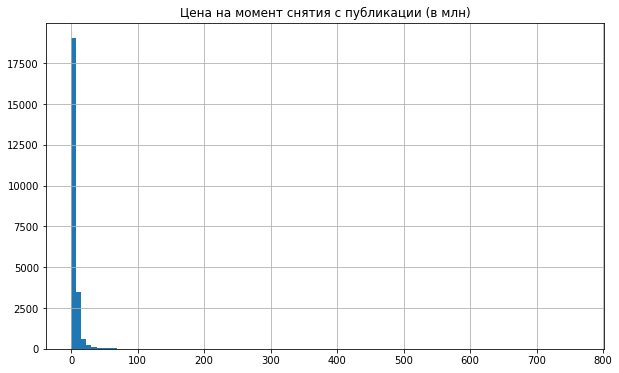

In [19]:
print((estate_data['last_price']/1000000).describe())
plt.title('Цена на момент снятия с публикации (в млн)');
# Переведем цену в миллионы
(estate_data['last_price']/1000000).hist(bins=100, figsize=(10,6));

In [20]:
estate_data.loc[estate_data['last_price']/1000000 >= 100, 'last_price'].count()

37

По графику видно, что основная часть значений распределена от 0 млн (от 0.5) до 20 млн. Особо экстремальных значений (выше 100 млн) всего 37. Оставим цены до 100 млн включительно.

count    23662.000000
mean         6.251508
std          6.424390
min          0.012190
25%          3.400000
50%          4.633500
75%          6.750000
max         99.000000
Name: last_price, dtype: float64


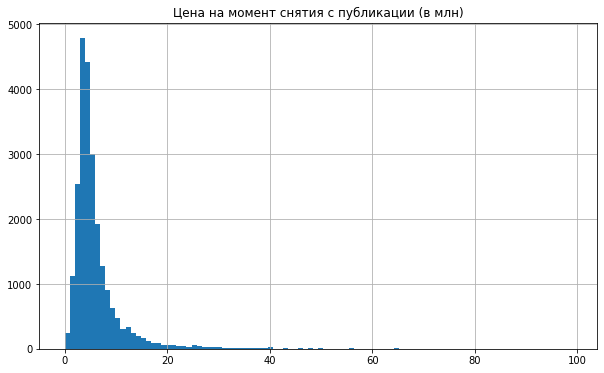

In [21]:
clean_estate_data = estate_data.query('last_price <= 100000000')
print((clean_estate_data['last_price']/1000000).describe())
plt.title('Цена на момент снятия с публикации (в млн)');
(clean_estate_data['last_price']/1000000).hist(bins=100, figsize=(10,6));

Обработаем аномалии в столбце total_area.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


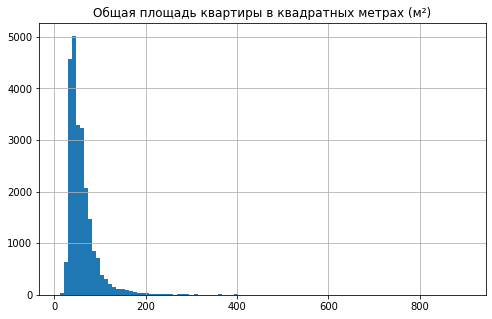

In [22]:
print(estate_data['total_area'].describe())
plt.title('Общая площадь квартиры в квадратных метрах (м²)')
estate_data['total_area'].hist(bins=100, figsize=(8,5));

По гистограмме видно, что есть очень мало значений примерно от 200 до 900. И это логично, площадь квартиры в 200 кв м и выше слишком большая.

Подсчитаем сколько таких выбивающихся значений.

In [23]:
estate_data.loc[estate_data['total_area'] >=200, 'total_area'].count()

231

Таких значений всего 231. Удалим их.

count    23472.000000
mean        58.179801
std         26.531909
min         12.000000
25%         40.000000
50%         51.900000
75%         68.925000
max        200.000000
Name: total_area, dtype: float64


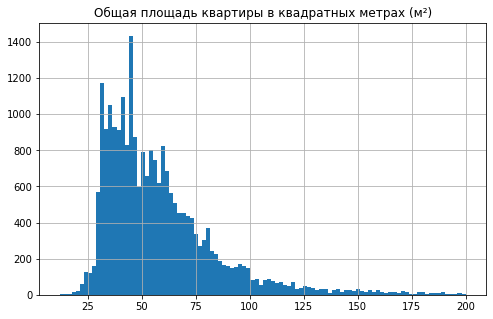

In [24]:
clean_estate_data = estate_data.query('total_area <= 200')
print(clean_estate_data['total_area'].describe())
plt.title('Общая площадь квартиры в квадратных метрах (м²)')
clean_estate_data['total_area'].hist(bins=100, figsize=(8,5));

Обработаем аномалии в столбце rooms.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


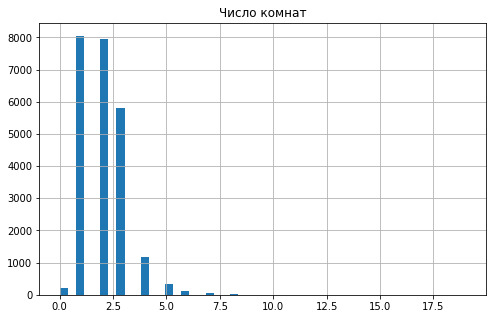

In [25]:
print(estate_data['rooms'].describe())
print(estate_data['rooms'].unique())
plt.title('Число комнат')
estate_data['rooms'].hist(bins=50, figsize=(8,5));

Во-первых, есть значение 0.

Во-вторых, есть очень высокие значения, и их не много, это 7-19 комнат. Такое встречается очень редко, так что уберем эти строки.

count    23272.000000
mean         2.050533
std          0.977214
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64
[3 1 2 4 5 6 7]


<AxesSubplot:title={'center':'Число комнат'}>

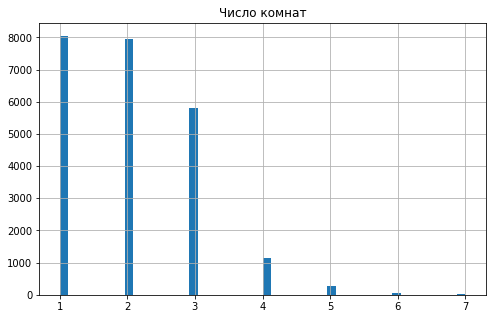

In [26]:
clean_estate_data = clean_estate_data.loc[(clean_estate_data['rooms'] > 0) & (clean_estate_data['rooms'] <= 7)]
print(clean_estate_data['rooms'].describe())
print(clean_estate_data['rooms'].unique())
plt.title('Число комнат')
clean_estate_data['rooms'].hist(bins=50, figsize=(8,5))

Обработаем аномалии в столбце ceiling_height.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
3
304


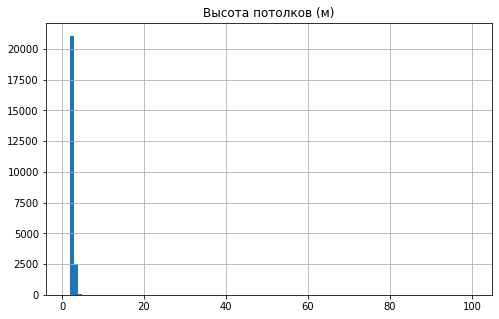

In [27]:
print(estate_data['ceiling_height'].describe())
print(estate_data.loc[estate_data['ceiling_height'] <2, 'rooms'].count())
print(estate_data.loc[estate_data['ceiling_height'] > 3.5, 'rooms'].count())
plt.title('Высота потолков (м)')
estate_data['ceiling_height'].hist(bins=100, figsize=(8,5));

Значения меньше 2 м и выше 3.5 м будем считать аномальными.

count    23013.000000
mean         2.680957
std          0.173716
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.500000
Name: ceiling_height, dtype: float64


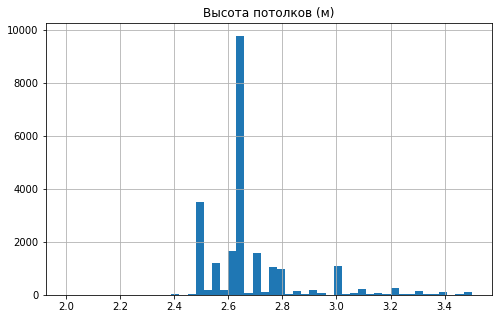

In [28]:
clean_estate_data = clean_estate_data.loc[(clean_estate_data['ceiling_height'] >= 2) & ((clean_estate_data['ceiling_height'] <= 3.5))]
print(clean_estate_data['ceiling_height'].describe())
plt.title('Высота потолков (м)')
clean_estate_data['ceiling_height'].hist(bins=50, figsize=(8,5));

Обработаем аномалии в столбце floors_total.

count    23699.000000
mean        10.638719
std          6.610834
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


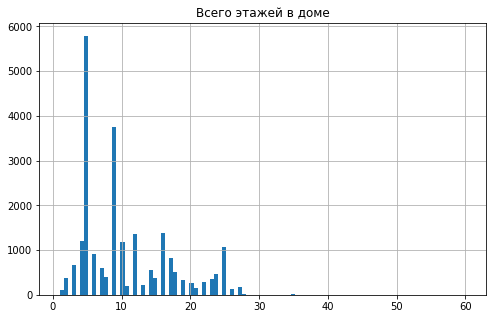

In [29]:
print(estate_data['floors_total'].describe())
plt.title('Всего этажей в доме')
estate_data['floors_total'].hist(bins=100, figsize=(8,5));

Возьмем данные от 1 до 35 этажей, т.к. google утверждает, что самое высокое здание в Санкт-Петербурге имеет 35 этажей.

count    23009.00000
mean        10.67830
std          6.57676
min          1.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         35.00000
Name: floors_total, dtype: float64


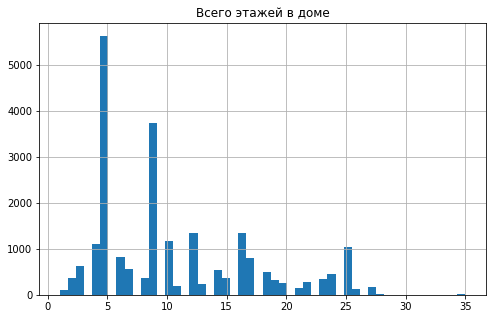

In [30]:
clean_estate_data = clean_estate_data.query('floors_total <= 35')
print(clean_estate_data['floors_total'].describe())
plt.title('Всего этажей в доме')
clean_estate_data['floors_total'].hist(bins=50, figsize=(8,5));

Обработаем аномалии в столбце living_area.

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64
25
33


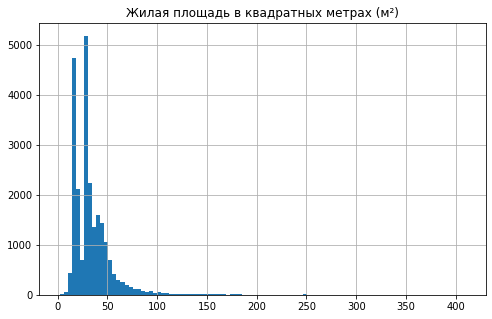

In [31]:
print(estate_data['living_area'].describe())
print(estate_data.loc[estate_data['living_area'] < 10, 'living_area'].count())
print(estate_data.loc[estate_data['living_area'] >=200, 'living_area'].count())
plt.title('Жилая площадь в квадратных метрах (м²)')
estate_data['living_area'].hist(bins=100, figsize=(8,5));

Оставим значения больше 10 и меньше 200.

count    22954.000000
mean        32.916619
std         16.319945
min         10.080000
25%         19.000000
50%         30.000000
75%         40.700000
max        164.700000
Name: living_area, dtype: float64


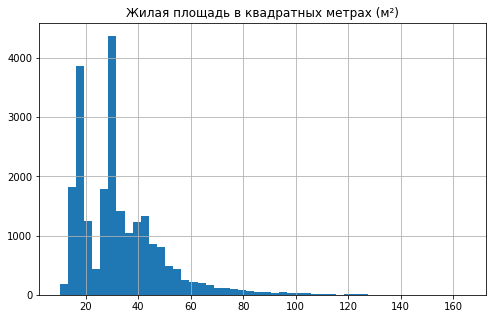

In [32]:
clean_estate_data = clean_estate_data.query('10 < living_area <= 200')
print(clean_estate_data['living_area'].describe())
plt.title('Жилая площадь в квадратных метрах (м²)')
clean_estate_data['living_area'].hist(bins=50, figsize=(8,5));

Обработаем аномалии в столбце kitchen_area.

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64


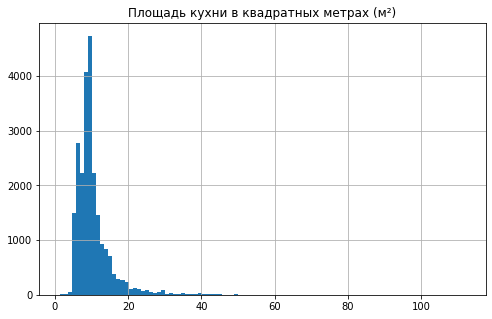

In [33]:
print(estate_data['kitchen_area'].describe())
plt.title('Площадь кухни в квадратных метрах (м²)')
estate_data['kitchen_area'].hist(bins=100, figsize=(8,5));

Оставим значенния, которые меньше 50.

count    22930.000000
mean        10.163024
std          4.747792
min          1.300000
25%          7.200000
50%          9.100000
75%         11.240000
max         50.000000
Name: kitchen_area, dtype: float64


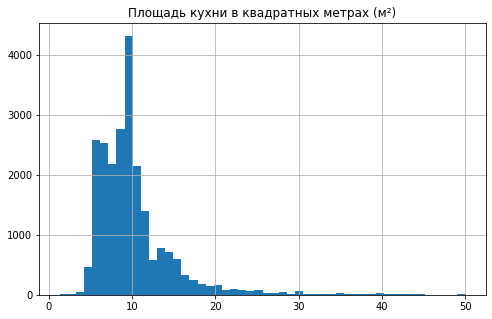

In [34]:
clean_estate_data = clean_estate_data.query('kitchen_area <= 50')
print(clean_estate_data['kitchen_area'].describe())
plt.title('Площадь кухни в квадратных метрах (м²)')
clean_estate_data['kitchen_area'].hist(bins=50, figsize=(8,5));

Обработаем аномалии в столбце airports_nearest.

count    23699.000000
mean     28310.148023
std      11090.330161
min          0.000000
25%      21183.000000
50%      26726.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64


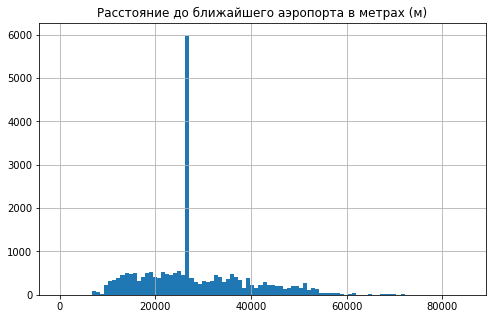

In [35]:
print(estate_data['airports_nearest'].describe())
plt.title('Расстояние до ближайшего аэропорта в метрах (м)')
estate_data['airports_nearest'].hist(bins=100, figsize=(8,5));

Есть одно значение равное 0 и несколько выбивающихся значений превышающих 70000 м. Уберем их.

count    22900.000000
mean     28316.599039
std      11025.482934
min       6450.000000
25%      21032.500000
50%      26726.000000
75%      34530.000000
max      69785.000000
Name: airports_nearest, dtype: float64


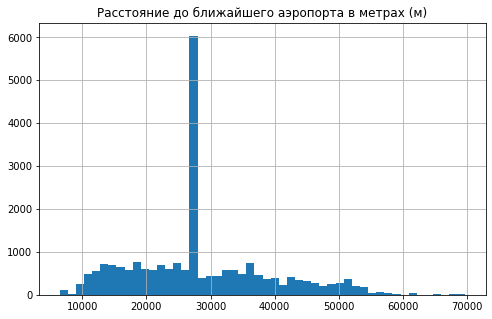

In [36]:
clean_estate_data = clean_estate_data.query('0 < airports_nearest < 70000')
print(clean_estate_data['airports_nearest'].describe())
plt.title('Расстояние до ближайшего аэропорта в метрах (м)')
clean_estate_data['airports_nearest'].hist(bins=50, figsize=(8,5));

Обработаем аномалии в столбце parks_nearest.

count    23699.000000
mean       467.205789
std        200.579309
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64


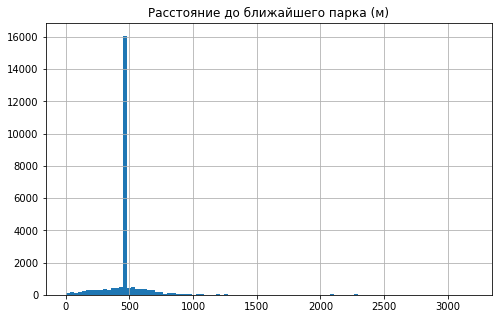

In [37]:
print(estate_data['parks_nearest'].describe())
plt.title('Расстояние до ближайшего парка (м)')
estate_data['parks_nearest'].hist(bins=100, figsize=(8,5));

Уберем значения превышающие 2500 и те, которые меньше 10.

count    22872.000000
mean       466.421257
std        189.741360
min         11.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       2489.000000
Name: parks_nearest, dtype: float64


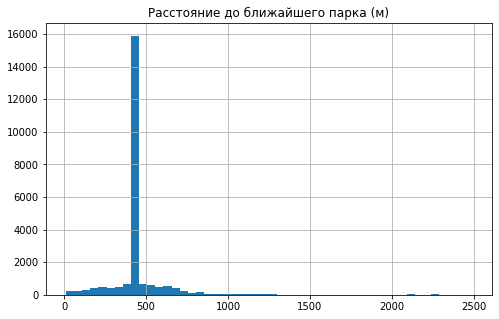

In [38]:
clean_estate_data = clean_estate_data.query('10 < parks_nearest < 2500')
print(clean_estate_data['parks_nearest'].describe())
plt.title('Расстояние до ближайшего парка (м)')
clean_estate_data['parks_nearest'].hist(bins=50, figsize=(8,5));

### Переименуем некоторые столбцы

In [39]:
clean_estate_data = clean_estate_data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
clean_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22872 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22872 non-null  int64         
 1   last_price            22872 non-null  int64         
 2   total_area            22872 non-null  float64       
 3   first_day_exposition  22872 non-null  datetime64[ns]
 4   rooms                 22872 non-null  int64         
 5   ceiling_height        22872 non-null  float64       
 6   floors_total          22872 non-null  int64         
 7   living_area           22872 non-null  float64       
 8   floor                 22872 non-null  int64         
 9   is_apartment          22872 non-null  bool          
 10  studio                22872 non-null  bool          
 11  open_plan             22872 non-null  bool          
 12  kitchen_area          22872 non-null  float64       
 13  balcony         

## Добавление в таблицу новых столбцов

In [40]:
# цена одного квадратного метра
clean_estate_data['price_per_meter'] = clean_estate_data['last_price'] / clean_estate_data['total_area']
clean_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028.0,1,482.0,2,755.0,95,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,поселок Шушары,12817,18603.0,0,455.0,0,502.0,81,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933.0,1,90.0,2,574.0,558,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,0,Санкт-Петербург,28098,6800.0,2,84.0,3,234.0,424,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098.0,2,112.0,1,48.0,121,100000.000000


In [41]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
clean_estate_data['weekday'] = pd.DatetimeIndex(clean_estate_data['first_day_exposition']).weekday
clean_estate_data['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23693    4
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 22872, dtype: int64

In [42]:
# месяц публикации объявления
clean_estate_data['month'] = pd.DatetimeIndex(clean_estate_data['first_day_exposition']).month
clean_estate_data['month']

0         3
1        12
2         8
3         7
4         6
         ..
23693     8
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 22872, dtype: int64

In [43]:
# год публикации объявления
clean_estate_data['year'] = pd.DatetimeIndex(clean_estate_data['first_day_exposition']).year
clean_estate_data['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23693    2016
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 22872, dtype: int64

In [44]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
         return 'последний'
    return 'другой'

clean_estate_data['type_floor'] = clean_estate_data.apply(type_floor, axis=1)
clean_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,95,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,455.0,0,502.0,81,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,2,84.0,3,234.0,424,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой


In [45]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
clean_estate_data['city_centers_nearest_km'] = (clean_estate_data['city_centers_nearest'] / 1000).astype('int')
clean_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,type_floor,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,95,120370.370370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,455.0,0,502.0,81,82920.792079,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3,234.0,424,408176.100629,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8


## Проведение исследовательского анализа данных

### Изучим следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

In [46]:
def create_hist(data, name):
    print('Медиана:', data.median())
    print('Среднее:', data.mean())
    plt.title(name)
    data.hist(bins=100, figsize=(8,5));
    

Медиана: 52.0
Среднее: 58.019459601259186


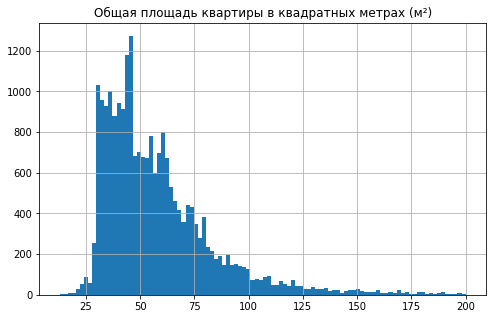

In [47]:
create_hist(clean_estate_data['total_area'], 'Общая площадь квартиры в квадратных метрах (м²)')

Медиана: 30.0
Среднее: 32.89384144421126


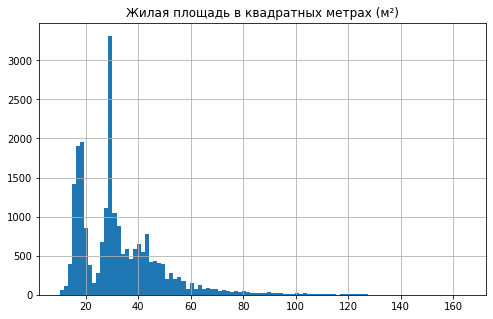

In [48]:
create_hist(clean_estate_data['living_area'], 'Жилая площадь в квадратных метрах (м²)')

Медиана: 9.1
Среднее: 10.164836044071352


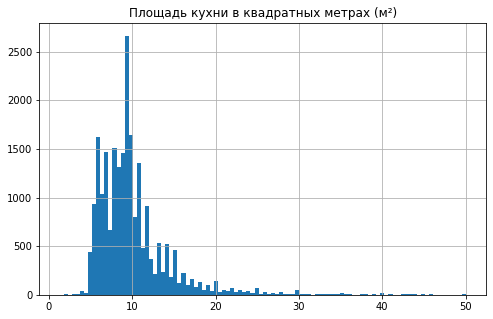

In [49]:
create_hist(clean_estate_data['kitchen_area'], 'Площадь кухни в квадратных метрах (м²)')

Медиана: 4.6
Среднее: 5.9423386371546005


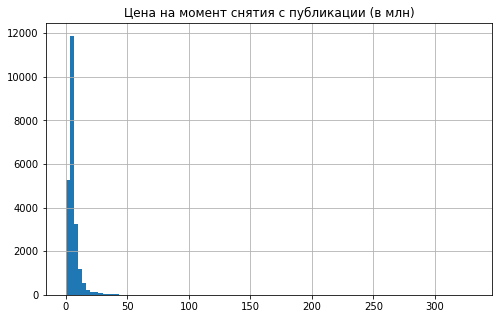

In [50]:
create_hist(clean_estate_data['last_price']/1000000, 'Цена на момент снятия с публикации (в млн)')

Медиана: 2.0
Среднее: 2.043240643581672


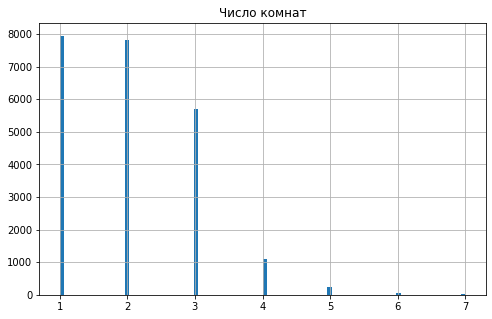

In [51]:
create_hist(clean_estate_data['rooms'], 'Число комнат')

Медиана: 2.65
Среднее: 2.680623469744666


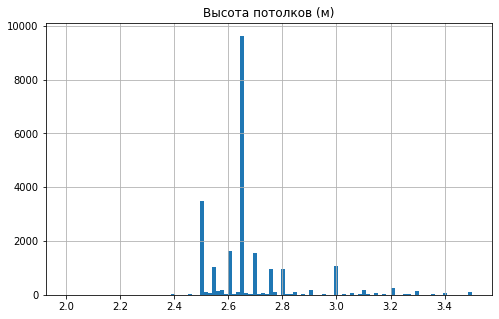

In [52]:
create_hist(clean_estate_data['ceiling_height'], 'Высота потолков (м)')

Медиана: 4.0
Среднее: 5.908884225253585


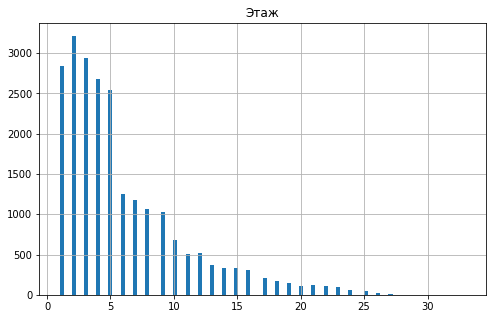

In [53]:
create_hist(clean_estate_data['floor'], 'Этаж')

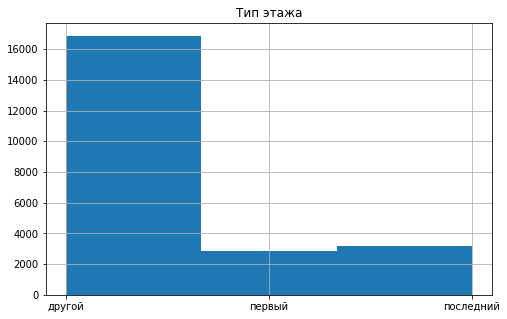

In [54]:
plt.title('Тип этажа')
clean_estate_data['type_floor'].hist(bins=3, figsize=(8,5));

Медиана: 9.0
Среднее: 10.691719132563833


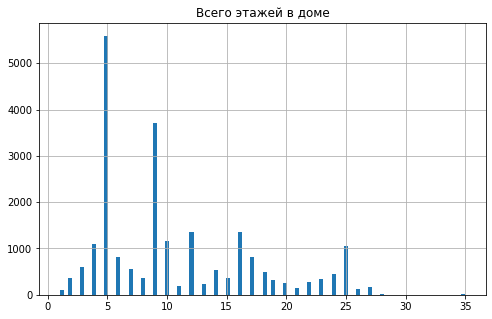

In [55]:
create_hist(clean_estate_data['floors_total'], 'Всего этажей в доме')

Медиана: 13098.5
Среднее: 14035.360440713535


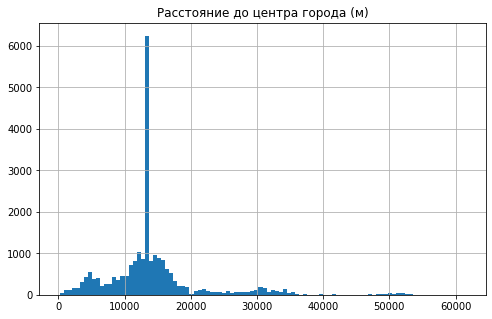

In [56]:
create_hist(clean_estate_data['city_centers_nearest'], 'Расстояние до центра города (м)')

Медиана: 26726.0
Среднее: 28312.077999300454


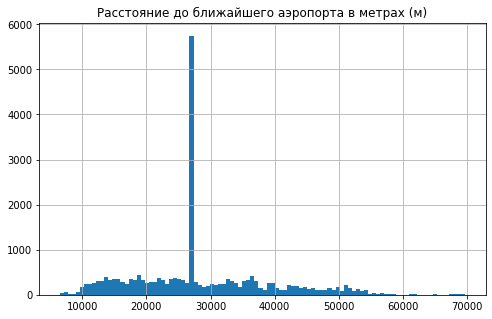

In [57]:
create_hist(clean_estate_data['airports_nearest'], 'Расстояние до ближайшего аэропорта в метрах (м)')

Медиана: 455.0
Среднее: 466.42125743266877


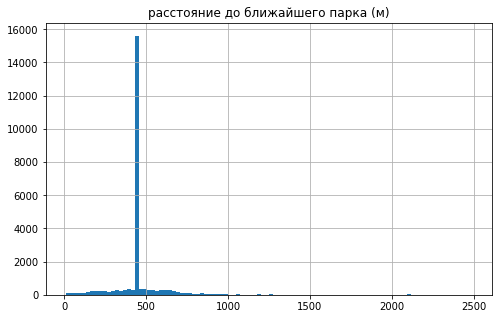

In [58]:
create_hist(clean_estate_data['parks_nearest'], 'расстояние до ближайшего парка (м)')

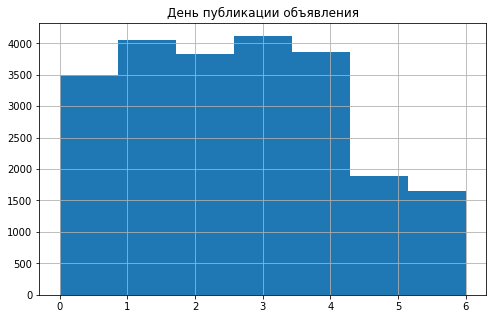

In [59]:
plt.title('День публикации объявления')
clean_estate_data['weekday'].hist(bins=7, figsize=(8,5));

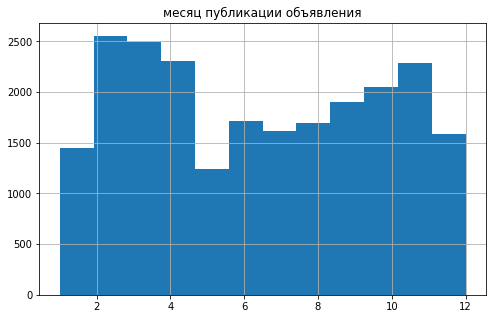

In [60]:
plt.title('месяц публикации объявления')
clean_estate_data['month'].hist(bins=12, figsize=(8,5));

**Промежуточные выводы:**
1. Общая площадь - самые распространенные значения общей площади находятся в промежутке примерно от 30 кв.м до 100 кв.м.
2. Жилая площадь - самые распространенные значения от 16 до 20 кв.м и от 25 д 50 кв.м, есть пик около 20 кв.м и пик 30 кв.м (медиана, мы заполнили пропуски медианным значением, поэтому получили такой пик).
3. Площадь кухни - основная масса значений находится в промежутки от 5 до 20 кв.м. Также есть пик 9 кв.м., который получился за счет заполнения пропусков медианным значением.
4. Цена объекта - столбец last_price по прежнему выдает неадекватные значения, не соответствующие реальным данным в столбце.
5. Количество комнат - больше всего комнат в количестве 1, 2 и 3.
6. Высота потолков - самые распространенные значения примерно от 2.5 до 3 м.
7. Этаж квартиры - самые распространенные значения от 1 до 17 этажа.
8. Тип этажа квартиры - самый распространненый тип "другой".
9. Общее количество этажей в доме - больше всего 4, 5, 9, 10, 12, 16 и 25 этажей.
10. Расстояние до центра города в метрах - самые распространенные значения от 3000 до 20000 м. Есть пик - заполненные пропуски.
11. Расстояние до ближайшего аэропорта - самые распространенные значения от 10000 до 40000 м. Есть пик - заполненные пропуски.
12. Расстояние до ближайшего парка - основная масса значений находится в диапазоне от 0 до 800 м. Есть пик (больше всего значений это пропуски) - медиана.
13. День публикации объявления - с пн по пт выкладывают больше всего объявлений.
14. Месяц публикации объявления - февраль, март, апрель, ноябрь - месяцы, в которые выкладывают больше всего объявлений.

### Изучим, как быстро продавались квартиры. Построим гистограмму. Посчитаем среднее и медиану.

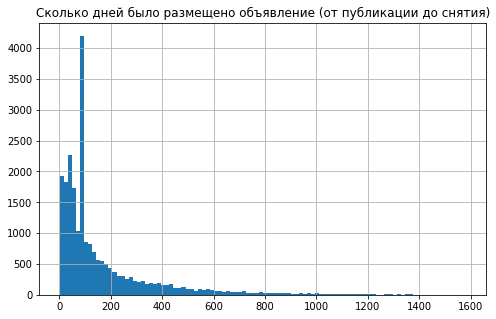

In [61]:
# Построим гистограмму
plt.title('Сколько дней было размещено объявление (от публикации до снятия)')
clean_estate_data['days_exposition'].hist(bins=100, figsize=(8,5));

count    22872.00000
mean       168.42187
std        205.29808
min          1.00000
25%         45.00000
50%         95.00000
75%        197.00000
max       1580.00000
Name: days_exposition, dtype: float64


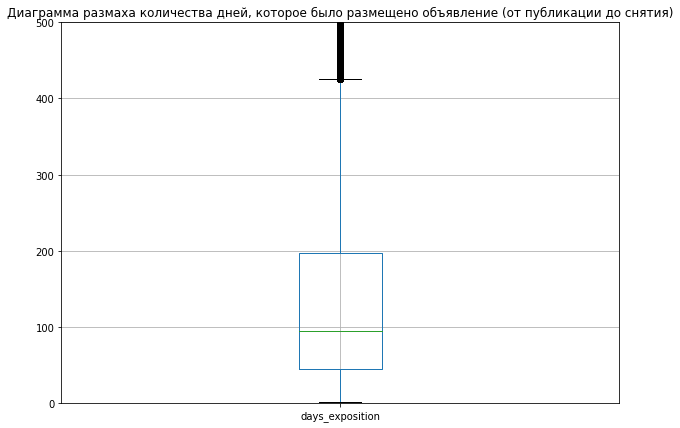

In [62]:
# Посчитаем среднее и медиану
print(clean_estate_data['days_exposition'].describe())
plt.figure(figsize=(10,7))
plt.ylim(0, 500)
plt.title('Диаграмма размаха количества дней, которое было размещено объявление (от публикации до снятия)')
pd.DataFrame(data=clean_estate_data['days_exposition']).boxplot();

В среднем продажи занимают 95 дней.

Быстрыми можно считать продажи от 0 до 200 дней.

Необычно долгими можно считать продажи превышающие 420 дней.

### Определм факторы, которые больше всего влияют на общую (полную) стоимость объекта

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- даты размещения (день недели, месяц, год).

In [63]:
# Изучим зависимость стоимости объекта от общей площади, посчитаем корреляцию
print(clean_estate_data['last_price'].corr(clean_estate_data['total_area']))

0.6596410348047066


In [64]:
# Изучим зависимость стоимости объекта от жилой площади
print(clean_estate_data['last_price'].corr(clean_estate_data['living_area']))

0.5190230172726973


In [65]:
# Изучим зависимость стоимости объекта от площади кухни
print(clean_estate_data['last_price'].corr(clean_estate_data['kitchen_area']))

0.4771795575839346


In [66]:
# Изучим зависимость стоимости объекта от количества комнат
print(clean_estate_data['last_price'].corr(clean_estate_data['rooms']))

0.38146124439137985


In [67]:
# Изучим зависимость стоимости объекта от дат размещения (день недели, месяц, год)
print(clean_estate_data['last_price'].corr(clean_estate_data['weekday']))
print(clean_estate_data['last_price'].corr(clean_estate_data['month']))
print(clean_estate_data['last_price'].corr(clean_estate_data['year']))

-0.011020126217460053
0.0048791598080377245
-0.03489970531777741


Если оценивать корреляцию, то есть прямая зависимость между стоимостью объекта и общей площадью - чем выше стоимость, тем выше общая площадь. То же самое для жилой площади и площади кухни, и количества комнат, но там зависимость не такая сильная.

Корреляции между стоимостью объекта и датами размещения (день недели, месяц, год) нет.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [68]:
rating_settlements1 = clean_estate_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='count').sort_values('price_per_meter',ascending=False).head(10)
rating_settlements2 = clean_estate_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
rating_settlements = rating_settlements1.merge(rating_settlements2, on='locality_name', how='left')
rating_settlements.columns = ['count', 'mean_price_per_meter']
rating_settlements.sort_values('mean_price_per_meter')

,count,mean_price_per_meter
locality_name,,
Выборг,231,58097.213552
Всеволожск,390,68513.921574
Гатчина,305,68811.372828
Колпино,337,75333.295801
поселок Шушары,434,78408.166495
поселок Мурино,525,84903.706998
поселок Парголово,322,90448.423806
поселок Кудрово,282,92286.397505
Пушкин,356,102672.275384


Самая высокая стоимость за кв.м в Санкт-Петербурге.

Самая низкая стоимость за кв.м в Выборге.

### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

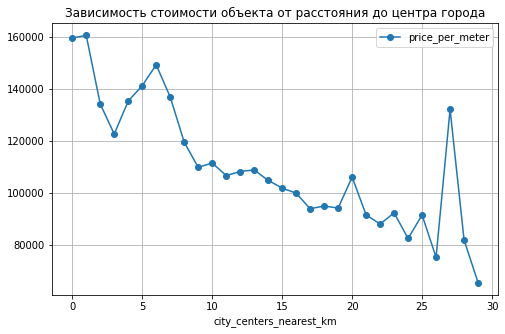

In [69]:
spb_price_km = clean_estate_data.query('locality_name == "Санкт-Петербург"')
spb_price_km = spb_price_km.pivot_table(index='city_centers_nearest_km', values='price_per_meter', aggfunc='mean')
spb_price_km.plot(style='o-', figsize=(8,5), grid=True, title='Зависимость стоимости объекта от расстояния до центра города');

По графику видно, что чем ближе к центру, тем доороже стоимость помещения. хотя есть некоторые выбивающиеся значения (пики на графике), но возможно они связаны с другими факторами.

## Выводы

Мы получили данные о недвижимости. В них было очень много пропусков, которые мы заполняли медианным значением, что в значительной степени могло повлиять на анализ данных.

Мы выяснили что в среднем продажи занимают 95 дней. Быстрыми можно считать продажи от 0 до 200 дней. Необычно долгими можно считать продажи превышающие 420 дней.

Также было выяснено, что больше всего на цену жилья влияет его общая площадь.

Из городов с наибольшим числом объявлений самая высокая стоимость за кв.м в Санкт-Петербурге, самая низкая стоимость за кв.м в Выборге.

Чем ближе помещение расположено к центру города, тем оно дороже.